In [4]:
# Code taken from qiskit teleportation demo:
# https://qiskit.org/textbook/ch-algorithms/teleportation.html#2.-The-Quantum-Teleportation-Protocol-

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
#from qiskit.ignis.verification import marginal_counts
from qiskit.quantum_info import random_statevector

def create_bell_pair(qc, a, b):
    qc.h(a)
    qc.cx(a, b)

def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'

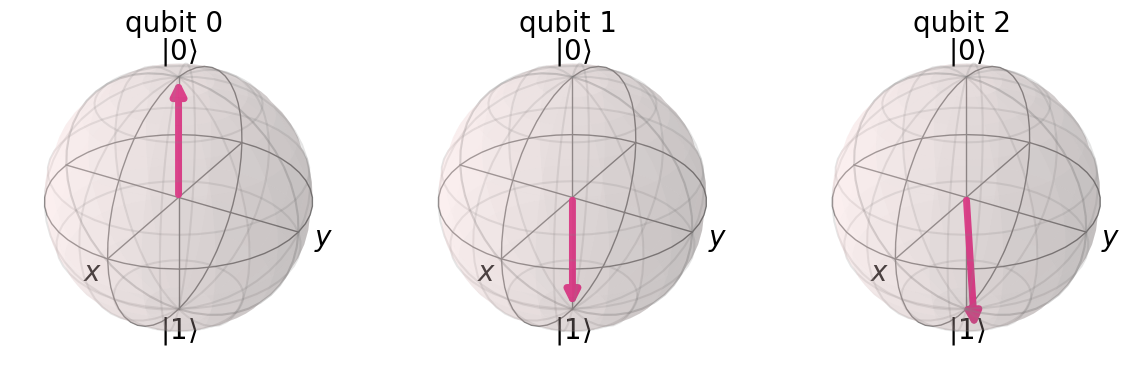

In [36]:
""" Serves as an experiment to demonstrate teleporting a qubit psi
    using classical registers and a Bell pair
"""
# setup
psi = random_statevector(2)
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)
teleportation_circuit.append(Initialize(psi), [0])
plot_bloch_multivector(psi)
# step 1
create_bell_pair(teleportation_circuit, 1, 2)
## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)
## STEP 3
measure_and_send(teleportation_circuit, 0, 1)
## STEP 4
teleportation_circuit.barrier() # Use barrier to separate steps
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw()
sim = Aer.get_backend('aer_simulator')
teleportation_circuit.save_statevector()
out_vector = sim.run(teleportation_circuit).result().get_statevector()
plot_bloch_multivector(out_vector)

In [29]:
def teleport_qubit(qc):
    # Teleports a qubit from sender to receiver using entangled pairs in a tunneling experiment
    # steps:
    # accept qubit
    # create bell pair
    print("Hello!")
    # apply sending gates hadamard and CNOT
    # measure and send
    # apply receiving gates